In [190]:
!pip install swig==3.0.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 815.0 kB/s eta 0:00:00m eta 0:00:010:00:01


In [191]:
!pip install -I --no-cache-dir jamspell

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.3/174.3 kB 892.8 kB/s eta 0:00:001m733.5 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for jamspell: filename=jamspell-0.0.12-cp39-cp39-linux_x86_64.whl size=172885 sha256=be5c3e0fdaa974e50b355efc9ffaeb0a96e571af33aa56e83c6923ab31a579b3
  Stored in directory: /tmp/pip-ephem-wheel-cache-jzz3rwdw/wheels/fa/7e/8f/c23ae02f1556243d33cc2e3bddf98f8cc146e174e5855788b6
Successfully built jamspell


In [6]:
!pip install pymorphy2
!pip install pymorphy2-dicts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 514.2 kB/s eta 0:00:0031m2.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 848.2 kB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached docopt-0.6.2-py2.py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 809.9 kB/s eta 0:00:00m eta 0:00:010:00:01


In [64]:
import pandas as pd
import numpy as np
import string
import re
import warnings
import json
import nltk
import jamspell
from tqdm import tqdm
import pymorphy2
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
sns.set_style("whitegrid")

In [2]:
warnings.simplefilter('ignore')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/alexandra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dataset Information

**work_name** – Text name of the task in the construction plan (without preprocessing).

**upper_works** – Information about the hierarchy of names of objects and work blocks within which
this task was performed. If tasks have the same value of this attribute - it means that they were
performed within one block of works on one object (may be empty).

**generalized_work_class** – Information about the generalized work name class to which the task
belongs (may be empty).

**global_work_class** – Information about the highest level of generalization of the task name (may
be empty).

### Read Data

In [80]:
df = pd.read_csv("lab2_oil_gas_field_construction_data.csv")

In [81]:
df.head(10)

,work_name,generalized_work_class,global_work_class,upper_works
0,монтаж ограждения основания блоков управления са,NaN,NaN,NaN
1,монтаж стоек,NaN,NaN,"('Подготовка свай', 'Монтаж ограждения')"
2,монтаж трубопровода г16/1 газ с предохранитель...,NaN,NaN,NaN
3,монтад лестниц,Монтаж лестниц,Строительство зданий,NaN
4,монтаж площадок,NaN,NaN,NaN
5,технологическая обвязка рессиверов газа v-25м3...,NaN,NaN,NaN
6,электромонтажные работы,NaN,NaN,NaN
7,кипиа,Монтаж приборов,Монтаж,NaN
8,монтаж маслоприемников 1.6.2,NaN,NaN,NaN
9,электромонтажные работы 1.4.2,ПНР,ПНР,NaN


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 716067 entries, 0 to 716066
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   work_name               716067 non-null  object
 1   generalized_work_class  296858 non-null  object
 2   global_work_class       296858 non-null  object
 3   upper_works             25039 non-null   object
dtypes: object(4)
memory usage: 21.9+ MB


In [83]:
# Get all possible generalized_work_class, global_work_class and upper_work
gen_wc_set = set(df["generalized_work_class"])
gl_wc = set(df["global_work_class"])
up_w = set(df["upper_works"])

print("The number of unique generalized_work_class:", len(gen_wc_set))
print("The number of unique global_work_class:", len(gl_wc))
print("The number of unique upper_work:", len(up_w))

The number of unique generalized_work_class: 208
The number of unique global_work_class: 57
The number of unique upper_work: 8


<AxesSubplot:xlabel='generalized_work_class', ylabel='count'>

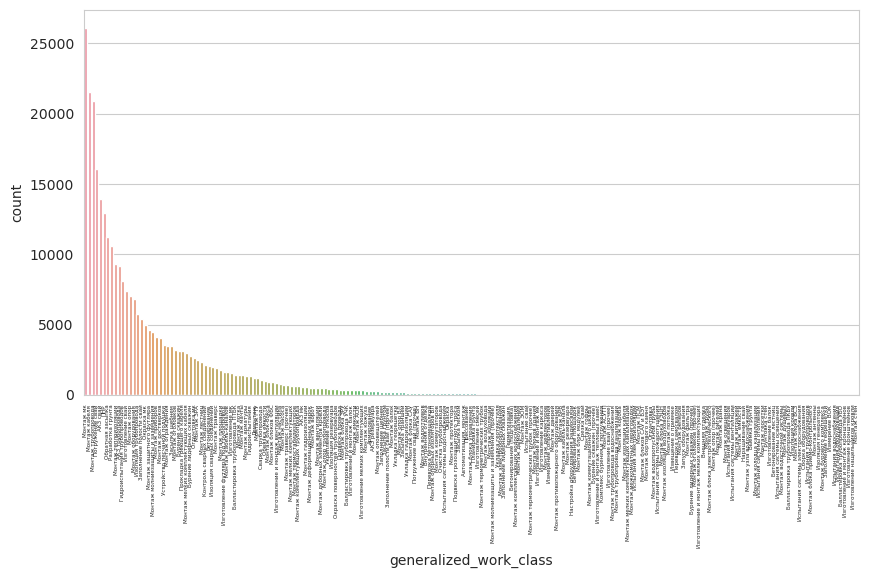

In [84]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=4)
sns.countplot(x="generalized_work_class", data=df, 
              order=df["generalized_work_class"].value_counts().index)

<AxesSubplot:xlabel='global_work_class', ylabel='count'>

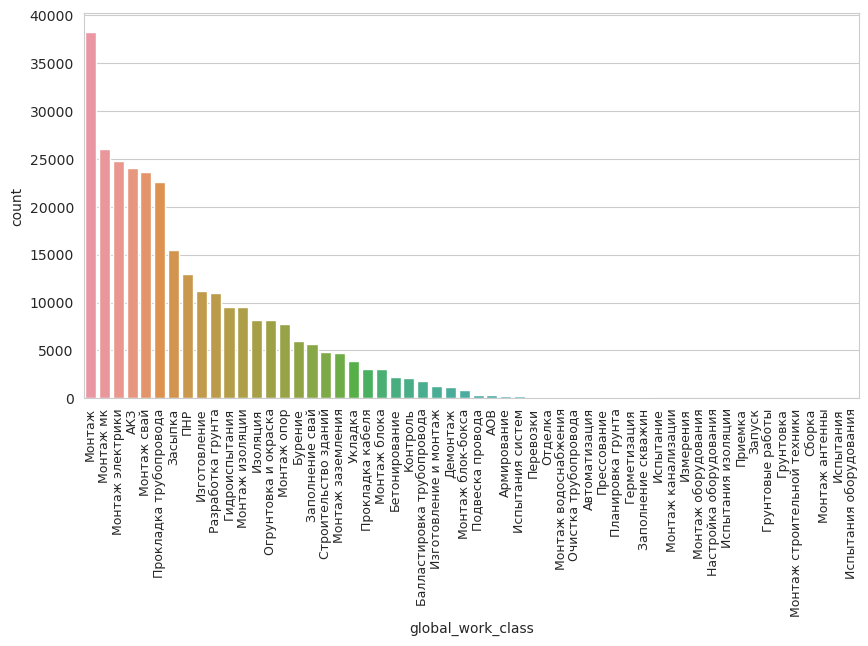

In [87]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=9)
sns.countplot(x="global_work_class", data=df, 
              order=df["global_work_class"].value_counts().index)

<AxesSubplot:xlabel='upper_works', ylabel='count'>

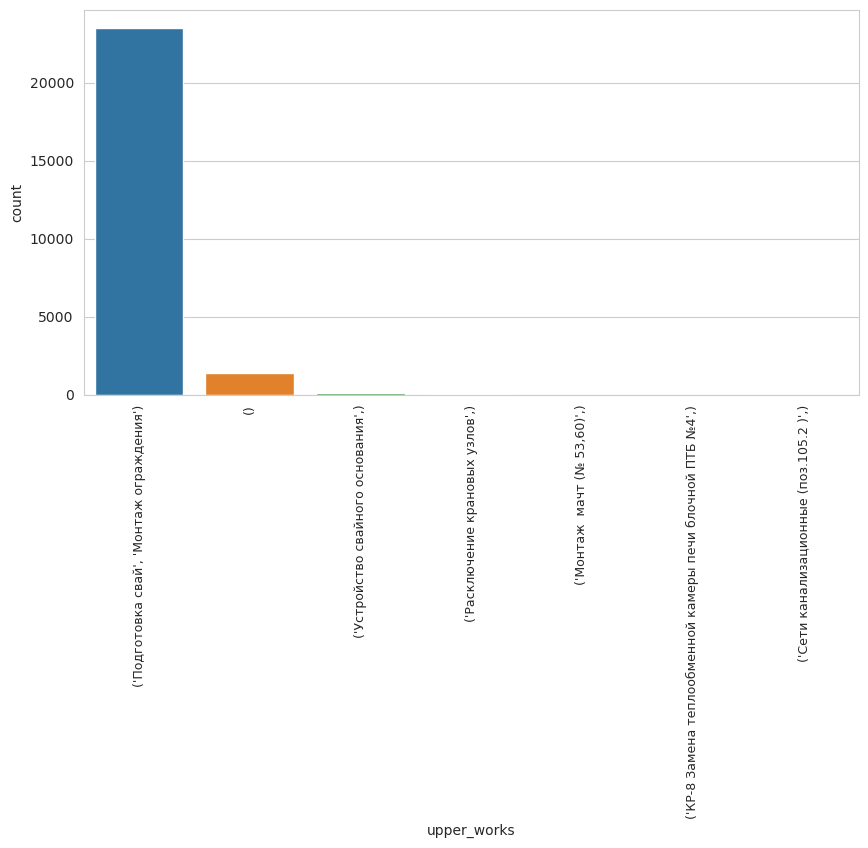

In [91]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=9)
sns.countplot(x="upper_works", data=df, 
              order=df["upper_works"].value_counts().index)

In [7]:
df = df.drop(columns=["upper_works"])
# Remove duplicates
df = df.dropna()
df = df.drop_duplicates() 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14579 entries, 3 to 708595
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   work_name               14579 non-null  object
 1   generalized_work_class  14579 non-null  object
 2   global_work_class       14579 non-null  object
dtypes: object(3)
memory usage: 455.6+ KB


In [101]:
df.to_csv("dataset.csv")

In [91]:
up_w

{"('КР-8 Замена теплообменной камеры печи блочной ПТБ №4',)",
 "('Монтаж  мачт (№ 53,60)',)",
 "('Подготовка свай', 'Монтаж ограждения')",
 "('Расключение крановых узлов',)",
 "('Сети канализационные (поз.105.2 )',)",
 "('Устройство свайного основания',)",
 '()',
 nan}

In [92]:
gen_wc_set

{nan,
 'АКЗ мк',
 'АКЗ резервуара',
 'АКЗ свай',
 'АКЗ трубопровода',
 'Автоматизация, монтаж',
 'Армирование',
 'Балластировка трубопровода ПКБУ',
 'Балластировка трубопровода ПТБК',
 'Балластировка трубопровода УБО',
 'Балластировка трубопровода УЧК',
 'Бетонирование',
 'Бетонирование (подготовка)',
 'Бетонирование лестниц',
 'Бетонирование площадок',
 'Бурение лидерных скважин',
 'Бурение лидерных скважин (прочее)',
 'Бурение скважин',
 'Бурение скважин (прочее)',
 'Внешняя отделка',
 'Внутренняя отделка',
 'Выемка грунта',
 'Герметизация',
 'Гидроиспытания',
 'Гидроиспытания трубопроводов',
 'Грунтовка стен',
 'Демонтаж',
 'Заполнение георешетки',
 'Заполнение лидерных скважин',
 'Заполнение полости свай',
 'Заполнение полости свай (прочее)',
 'Заполнение щебнем',
 'Запуск оборудования',
 'Засыпка грунтом',
 'Засыпка песком',
 'Засыпка траншеи',
 'Засыпка щебнем',
 'Извещение о приемке',
 'Изготовление балок',
 'Изготовление и монтаж балок',
 'Изготовление и монтаж вентиляции',
 'И

In [81]:
gl_wc

{nan,
 'АКЗ',
 'АОВ',
 'Автоматизация',
 'Армирование',
 'Балластировка трубопровода',
 'Бетонирование',
 'Бурение',
 'Герметизация',
 'Гидроиспытания',
 'Грунтовка',
 'Грунтовые работы',
 'Демонтаж',
 'Заполнение свай',
 'Заполнение скважин',
 'Запуск',
 'Засыпка',
 'Изготовление',
 'Изготовление и монтаж',
 'Измерения',
 'Изоляция',
 'Испытание',
 'Испытания',
 'Испытания изоляции',
 'Испытания оборудования',
 'Испытания систем',
 'Контроль',
 'Монтаж',
 'Монтаж антенны',
 'Монтаж блок-бокса',
 'Монтаж блока',
 'Монтаж водоснабжения',
 'Монтаж заземления',
 'Монтаж изоляции',
 'Монтаж канализации',
 'Монтаж мк',
 'Монтаж оборудования',
 'Монтаж опор',
 'Монтаж свай',
 'Монтаж строительной техники',
 'Монтаж электрики',
 'Настройка оборудования',
 'Огрунтовка и окраска',
 'Отделка',
 'Очистка трубопровода',
 'ПНР',
 'Перевозки',
 'Планировка грунта',
 'Подвеска провода',
 'Прессование',
 'Приемка',
 'Прокладка кабеля',
 'Прокладка трубопровода',
 'Разработка грунта',
 'Сборка',
 'Стро

generalized_work_class: 'Бурение лидерных скважин', 'Бурение лидерных скважин (прочее)'; 'Бурение скважин',  'Бурение скважин (прочее)'; 'Монтаж опор', 'Монтаж опор (прочее)'; etc. '{name} (прочее)'

global_work_class: 'Испытание', 'Испытания';

### Abbreviations

1) Удалить знаки препинания

2) Удалить цифры

3) Токенизировать (заменять уже токены)

мк - металлоконтсрукция

кипиа - контрольно-измерительные приборы и автоматика

вк - водоснабжение и канализация

пнр - пусконаладочные работы

гту - газотурбинная установка

сппк - сбросной пружинный предохранительный клапан

квоу - комплексное воздухоочистительное устройство 

зру-* - закрытое распределительное устройство (для столбца с таск), зру - для столбца с метками

м.р. - месторождение

эс - электроснабжение

тс - термостабилизатор (пара: монтаж системы тс; Монтаж термостабилизаторов)

дку - дожимная компрессорная установка или что-то связанное с кабелем, так как основной текст данной задачи несет в себе основную нагрузку во всех случаях, то данную аббревиатуру можно не расшифровывать 

убо - утяжелитель бетонный охватывающего типа 

грозотрос - грозозащитный тросс

опн - ограничитель перенапряжений

ктпсн, ктп сн - комплексные трансформаторные подстанции собственных нужд

ктп - комплексная транформаторная подстанция

опс - охранно-пожарная сигнализация 

сн, (сн) - собственные нужды

опн - ограничитель перенапряжения

пт - пожаротушение

бу - бывший в употреблении

акз - антикоррозионная защита

вл. вл-* - воздушные линии

коэф. - коэффициент 

уплотн.- уплотнение

коэф.уплотнен. - коэффициент уплотнения

(тм) - телемеханика (без учета скобок)

к{d}н, к{d}, кн - канализация 

ПДН AV - плита дорожная с предварительным напряжением; пдн{d} - плита дорожная

б{d+} - балка

св{d} - свая

ф{d} - фундамент

аов - автоматизация общеобменной вентиляции

(з) - заземление

(ст) - силовой трансформатор

рсм{d} - ростверк монолитный

кру - комплектное распределительное устройство

ппу - пенополиуретан

нк - неразрушающий контроль

от - оперативный ток

рзиа - релейная защита и автоматика 

гта - газотурбинные агрегаты

нку - низковольтные комплектные устройства 

сау - система автоматического управления

упп - устройство плавного пуска

т - трубопровод 

смр - строительно монтажные работы

кнс - кабеленесущая система

сппк -  сбросной пружинный предохранительный клапан

эхз - электрохимическая защита

п - плита

лкп - лакокрасочное покрытие

зра - запорная и регулирующая арматура

птб - печь трубчатая блочная

сс - система связи

пс - подстанция

асдуэ/астуэ - автоматизированная система диспетчерского управления электроснабжением автоматизированная система технического учета электроэнергии

вмс - ворота металлические распашные 

акл - армированная колючая лента

по - программное обеспечение

асу - автоматизированная система управления

тп - технологический процесс

ксо - камера сборная одностороннего обслуживания

авом - агрегат воздушного охлаждения масла

гтд - газотурбинный двигатель

тг - турбогенератор

ргсн - резервуар горизонтальный стальной наземный

хх - холостой ход

пкбу - полимерно контейнерные балластирующие устройства

птбк - полимерно текстильные балластирующие контейнеры

учк - утяжелитель чугунный кольцевой

вок - волоконно оптический кабель

асутп - автоматизированная система управления технологическим процессом

вн - выключатель нагрузки

уэцн - установка электро центробежного насоса 

бэт - электротехнические блоки

фбс - бетонных фундаментных блоков

аов -  автоматизация отопления и вентиляции

In [82]:
abbrev_dict = {"мк": "металлоконструкция",
               "кипиа": "контрольно измерительные приборы и автоматика",
               "вк": "водоснабжение и канализация", 
               "пнр": "пусконаладочные работы",
               "гту": "газотурбинная установка",
               "сппк": "сбросной пружинный предохранительный клапан",
               "квоу": "комплексное воздухоочистительное устройство",
               "зру": "закрытое распределительное устройство",
               "мр": "месторождение",
               "зрукв": "закрытое распределительное устройство",
               "эс": "электроснабжение",
               "тс": "термостабилизатор",
               "дку": "дожимная компрессорная установка",
               "убо": "утяжелитель бетонный охватывающего типа",
               "грозотрос": "грозозащитный тросс",
               "опн": "ограничитель перенапряжений",
               "ктпсн": "комплексные трансформаторные подстанции собственных нужд",
               "ктп": "комплексная транформаторная подстанция",
               "опс": "охранно пожарная сигнализация",
               "сн": "собственные нужды",
               "опн": "ограничитель перенапряжения",
               "пт": "пожаротушение",
               "бу": "бывший в употреблении",
               "акз": "антикоррозионная защита",
               "вл": "воздушные линии",
               "тм": "телемеханика",
               "кн": "канализация",
               "к": "канализация",
               "пдн av": "плита дорожная с предварительным напряжением",
               "пдн": "плита дорожная",
               "б": "балка",
               "св": "свая",
               "ф": "фундамент",
               "з": "заземление",
               "ст": "силовой трансформатор",
               "рсм": "ростверк монолитный",
               "кру": "комплектное распределительное устройство",
               "ппу": "пенополиуретан",
               "нк": "неразрушающий контроль",
               "от": "оперативный ток",
               "рзиа": "релейная защита и автоматика",
               "гта": "газотурбинные агрегаты",
               "нку": "низковольтные комплектные устройства",
               "сау": "система автоматического управления",
               "упп": "устройство плавного пуска",
               "т": "трубопровод",
               "смр": "строительно монтажные работы",
               "кнс": "кабеленесущая система",
               "сппк": "сбросной пружинный предохранительный клапан",
               "эхз": "электрохимическая защита",
               "п": "плита",
               "лкп": "лакокрасочное покрытие",
               "зра": "запорная и регулирующая арматура",
               "птб": "печь трубчатая блочная",
               "сс": "система связи",
               "пс":  "подстанция",
               "асдуэастуэ": "автоматизированная система диспетчерского управления электроснабжением автоматизированная система технического учета электроэнергии",
               "асдуэ": "автоматизированная система диспетчерского управления электроснабжением",
               "астуэ": "автоматизированная система технического учета электроэнергии",
               "вмс": "ворота металлические распашные",
               "акл": "армированная колючая лента",
               "по": "программное обеспечение",
               "асу": "автоматизированная система управления",
               "тп": "технологический процесс",
               "ксо": "камера сборная одностороннего обслуживания",
               "авом": "агрегат воздушного охлаждения масла",
               "гтд": "газотурбинный двигатель",
               "тг": "турбогенератор",
               "ргсн": "резервуар горизонтальный стальной наземный",
               "хх": "холостой ход",
               "пкбу": "полимерно контейнерные балластирующие устройства",
               "птбк": "полимерно текстильные балластирующие контейнеры", 
               "учк": "утяжелитель чугунный кольцевой",
               "вок": "волоконно оптический кабель",
               "асутп": "автоматизированная система управления технологическим процессом",
               "асу тп": "автоматизированная система управления технологическим процессом",
               "вн": "выключатель нагрузки",
               "уэцн": "установка электро центробежного насоса",
               "бэт": "электротехнические блоки",
               "фбс": "бетонные фундаментные блоки",
               "аов": "автоматизация отопления и вентиляции",
               "цпс": "цементно песчаная смесь",
               "пгв": "площадка",
               "лгв": "лестница",
               "олг": "ограждение лестницы",
               "огп": "ограждение площадки",
               "бмз": "блочно модульное здание",
               "ол": "ограждение лестницы",
               "бптрг": "блок подготовки топливного газа",
               "бптг": "блок подготовки топливного газа",
               "спцв": "сепаратор пыли центробежный",
               "спц": "сепаратор пыли центробежный",
               "гпа": "газоперекачивающий агрегат"}

# Serializing json
json_object = json.dumps(abbrev_dict, indent=4, ensure_ascii=False)
 
# Writing to sample.json
with open("abbreviations.json", "w") as outfile:
    outfile.write(json_object)

### Data Preprocessing

In [9]:
STOPWORDS = nltk.corpus.stopwords.words('russian')
STEMMER = nltk.SnowballStemmer("russian")
MORPH = pymorphy2.MorphAnalyzer()

def remove_punct(text):
    # Remove punctiation and digits
    if pd.isna(text):
        return np.nan
    
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', ' ', text)
    return text


def tokenization(text):
    text = re.split('\W+', text)
    return text


def replace_abbreviations(text, abb_dict):
    if pd.isna(text):
        return np.nan
    text = text.replace('ё', 'е')
    
    for abbr, transcript in abb_dict.items():
        text = re.sub(fr"\b{abbr}\b", transcript, text)
    
    return text


def tokenization(text):
    if pd.isna(text):
        return np.nan
    text = re.split('\W+', text)
    return text


def remove_stopwords(text):
    try:
        text = [word for word in text if word not in STOPWORDS]
        return text
    except:
        return np.nan
    

def remove_short_words(text):
    try:
        text = [word for word in text if len(word) > 2]
        return text
    except:
        return np.nan
    

def do_string(text):
    try:
        text = " ".join(text)
        return text
    except:
        return np.nan
    

def stemming(text):
    try:
        text = [STEMMER.stem(word) for word in text]
        return text
    except:
        return np.nan
    
    
def lemmatization(text):
    try:
        text = [MORPH.normal_forms(word)[0] for word in text]
        return text
    except:
        return np.nan

    
def data_preprocessing(df, abbrev_dict, corrector, STEMMING_FLAG=False, SPELLCHECK_FLAG=False, LEMMA_FLAG=False):
    columns = df.columns

    df["work_name"] = df["work_name"].apply(lambda x: remove_punct(x))
    df["work_name"] = df["work_name"].apply(lambda x: x.lower() if not pd.isna(x) else np.nan)
    df["work_name"] = df["work_name"].apply(lambda x: replace_abbreviations(x, abbrev_dict))
    if SPELLCHECK_FLAG:
        df["work_name"] = df["work_name"].apply(lambda x: corrector.FixFragment(x) if not pd.isna(x) else np.nan)    
    df["work_name"] = df["work_name"].apply(lambda x: tokenization(x))
    df["work_name"] = df["work_name"].apply(lambda x: remove_stopwords(x))
    df["work_name"] = df["work_name"].apply(lambda x: remove_short_words(x))   
    if LEMMA_FLAG:
        df["work_name"] = df["work_name"].apply(lambda x: lemmatization(x))
    if STEMMING_FLAG:
        df["work_name"] = df["work_name"].apply(lambda x: stemming(x))
    df["work_name"] = df["work_name"].apply(lambda x: do_string(x))
    
    return df

In [94]:
# Load file with abbreviations

with open('abbreviations.json') as json_file:
    abbrev_dict = json.load(json_file)

In [95]:
abbrev_dict

{'мк': 'металлоконструкция',
 'кипиа': 'контрольно измерительные приборы и автоматика',
 'вк': 'водоснабжение и канализация',
 'пнр': 'пусконаладочные работы',
 'гту': 'газотурбинная установка',
 'сппк': 'сбросной пружинный предохранительный клапан',
 'квоу': 'комплексное воздухоочистительное устройство',
 'зру': 'закрытое распределительное устройство',
 'мр': 'месторождение',
 'зрукв': 'закрытое распределительное устройство',
 'эс': 'электроснабжение',
 'тс': 'термостабилизатор',
 'дку': 'дожимная компрессорная установка',
 'убо': 'утяжелитель бетонный охватывающего типа',
 'грозотрос': 'грозозащитный тросс',
 'опн': 'ограничитель перенапряжения',
 'ктпсн': 'комплексные трансформаторные подстанции собственных нужд',
 'ктп': 'комплексная транформаторная подстанция',
 'опс': 'охранно пожарная сигнализация',
 'сн': 'собственные нужды',
 'пт': 'пожаротушение',
 'бу': 'бывший в употреблении',
 'акз': 'антикоррозионная защита',
 'вл': 'воздушные линии',
 'тм': 'телемеханика',
 'кн': 'канали

In [96]:
# Doanload spell checker
corrector = jamspell.TSpellCorrector()
corrector.LoadLangModel('ru_small.bin')

True

#### Pipeline

In [105]:
# Test pipeline
tmp_df = df[:2000].copy(deep=True)

In [106]:
tmp_df = data_preprocessing(tmp_df, abbrev_dict, corrector, False, True)

In [107]:
tmp_df.head(50)

,work_name,generalized_work_class,global_work_class
3,монтаж лестниц,Монтаж лестниц,Строительство зданий
7,контрольно измерительные приборы автоматика,Монтаж приборов,Монтаж
9,электромонтажные работы,ПНР,ПНР
10,погружение свай сваи,Погружение свай,Монтаж свай
12,монтаж системы водоснабжение канализация,Испытания системы водоснабжения,Испытания систем
13,монтаж стоек,Монтаж мк,Монтаж мк
15,монтаж балок эстакаду,Монтаж мк,Монтаж мк
17,погружение свай,Погружение свай,Монтаж свай
26,засыпка полости свай,Заполнение полости свай,Заполнение свай
33,монтаж трубопровода конденсата,Монтаж трубопровода,Прокладка трубопровода


In [100]:
corrector.FixFragment('огрунтовка и окраска металлоконструкций')

'грунтовка и окраска металлоконструкций'

In [213]:
corrector.FixFragment('технологическая обвязка газосборника сжатого азота')

'технологическая обвязка газосборника сжатого азота'

In [215]:
corrector.FixFragment('монтад лестниц')

'монтаж лестниц'

In [216]:
corrector.FixFragment('расключение кабеля')

'исключением кабеля'

In [217]:
corrector.FixFragment('основание полощадки бетон в15')

'основание площадки бетон в15'

#### Full Dataset

In [113]:
# Without stemming and spell checking
no_stemming_no_spellcheck_df = data_preprocessing(df.copy(deep=True), abbrev_dict, corrector, False, False)
no_stemming_no_spellcheck_df.to_csv("data_no_stemming_no_spellcheck.csv")

# Without stemming, with spell checking
no_stemming_spellcheck_df = data_preprocessing(df.copy(deep=True), abbrev_dict, corrector, False, True)
no_stemming_spellcheck_df.to_csv("data_no_stemming_spellcheck.csv")

# With stemming, without spell checking
stemming_no_spellcheck_df = data_preprocessing(df.copy(deep=True), abbrev_dict, corrector, True, False)
stemming_no_spellcheck_df.to_csv("data_stemming_no_spellcheck.csv")

# With stemming, with spell checking
stemming_spellcheck_df = data_preprocessing(df.copy(deep=True), abbrev_dict, corrector, True, True)
stemming_no_spellcheck_df.to_csv("data_stemming_spellcheck.csv")

In [108]:
df = pd.read_csv("dataset.csv", index_col=0)

# With lemmatization and spell checking
lemmatization_spellcheck_df = data_preprocessing(df.copy(deep=True), 
                                                 abbrev_dict, corrector, 
                                                 STEMMING_FLAG=False, 
                                                 SPELLCHECK_FLAG=True, 
                                                 LEMMA_FLAG=True)
lemmatization_spellcheck_df.to_csv("data_lemmatization_spellcheck.csv")

# With lemmatization and spell checking
lemmatization_no_spellcheck_df = data_preprocessing(df.copy(deep=True), 
                                                 abbrev_dict, corrector, 
                                                 STEMMING_FLAG=False, 
                                                 SPELLCHECK_FLAG=False, 
                                                 LEMMA_FLAG=True)
lemmatization_no_spellcheck_df.to_csv("data_lemmatization_no_spellcheck.csv")


In [109]:
lemmatization_spellcheck_df.head(10)

,work_name,generalized_work_class,global_work_class
3,монтаж лестница,Монтаж лестниц,Строительство зданий
7,контрольный измерительный прибор автоматика,Монтаж приборов,Монтаж
9,электромонтажный работа,ПНР,ПНР
10,погружение свая свая,Погружение свай,Монтаж свай
12,монтаж система водоснабжение канализация,Испытания системы водоснабжения,Испытания систем
13,монтаж стойка,Монтаж мк,Монтаж мк
15,монтаж балка эстакада,Монтаж мк,Монтаж мк
17,погружение свая,Погружение свай,Монтаж свай
26,засыпка полость свая,Заполнение полости свай,Заполнение свай
33,монтаж трубопровод конденсат,Монтаж трубопровода,Прокладка трубопровода


In [112]:
len(set(lemmatization_spellcheck_df["generalized_work_class"]))

207

In [115]:
lemmatization_spellcheck_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14579 entries, 3 to 708595
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   work_name               14579 non-null  object
 1   generalized_work_class  14579 non-null  object
 2   global_work_class       14579 non-null  object
dtypes: object(3)
memory usage: 455.6+ KB


In [22]:
valid_df = pd.read_excel("lab2_test_dataset.xlsx", engine='openpyxl')   

In [23]:
valid_df.head(10)

,index,work_name,generalized_work_class,global_work_class
0,507695.0,"монтаж шаровых кранов, дроссельной шайбы, запо...",Монтаж мк,Монтаж мк
1,464317.0,монтаж кипиа и зра с электроприводом,Монтаж ЗРА,Монтаж
2,43108.0,монтаж оборудования и приборов,Монтаж приборов,Монтаж
3,114289.0,тх./поз.2.13.1-2/монтаж арматуры,Монтаж арматуры,Монтаж
4,331380.0,"монтаж шаровых кранов, огнепреградителя, дросс...",Монтаж мк,Монтаж мк
5,115807.0,монтаж оголовников свай (поз.4),Монтаж оголовков,Монтаж свай
6,543128.0,монтаж ограждения,Монтаж ограждения,Монтаж
7,20892.0,пнр,ПНР,ПНР
8,605922.0,устройство щебеночной подготовки,Засыпка щебнем,Засыпка
9,350432.0,монтаж кабельных муфт,Монтаж мелких комплектующих кабеля,Монтаж электрики


In [24]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197906 entries, 0 to 197905
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   index                   197904 non-null  float64
 1   work_name               197884 non-null  object 
 2   generalized_work_class  197902 non-null  object 
 3   global_work_class       197902 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.0+ MB


In [25]:
valid_df

,index,work_name,generalized_work_class,global_work_class
0,507695.0,"монтаж шаровых кранов, дроссельной шайбы, запо...",Монтаж мк,Монтаж мк
1,464317.0,монтаж кипиа и зра с электроприводом,Монтаж ЗРА,Монтаж
2,43108.0,монтаж оборудования и приборов,Монтаж приборов,Монтаж
3,114289.0,тх./поз.2.13.1-2/монтаж арматуры,Монтаж арматуры,Монтаж
4,331380.0,"монтаж шаровых кранов, огнепреградителя, дросс...",Монтаж мк,Монтаж мк
...,...,...,...,...
197901,449736.0,электромонтажные работы,ПНР,ПНР
197902,41406.0,гидроизоляция боковая обмазочная битумная,Гидроиспытания,Гидроиспытания
197903,74913.0,"монтаж запорного клапана, кранов",Монтаж мк,Монтаж мк
197904,105922.0,монтаж оборудования,Монтаж оборудования,Монтаж


In [27]:
# Remove duplicates
valid_df = valid_df.drop(["index"], axis=1)
valid_df = valid_df.dropna()
valid_df = valid_df.drop_duplicates(keep="first") 

In [28]:
valid_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11876 entries, 0 to 197905
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   work_name               11876 non-null  object
 1   generalized_work_class  11876 non-null  object
 2   global_work_class       11876 non-null  object
dtypes: object(3)
memory usage: 371.1+ KB


In [148]:
# With lemmatization and spell checking
test_lemmatization_spellcheck_df = data_preprocessing(valid_df.copy(deep=True), 
                                                 abbrev_dict, corrector, 
                                                 STEMMING_FLAG=False, 
                                                 SPELLCHECK_FLAG=True, 
                                                 LEMMA_FLAG=True)
test_lemmatization_spellcheck_df.to_csv("test_lemmatization_spellcheck.csv")

### Imbalanced classes

In [34]:
test_lemmatization_spellcheck_df = pd.read_csv("test_lemmatization_spellcheck.csv", index_col=0)

In [47]:
test_lemmatization_spellcheck_df.head(10)

,work_name,generalized_work_class,global_work_class
0,монтаж шаров крановый дроссельный шайба запорн...,Монтаж мк,Монтаж мк
1,монтаж контрольный измерительный прибор автома...,Монтаж ЗРА,Монтаж
2,монтаж оборудование прибор,Монтаж приборов,Монтаж
3,поздний монтаж арматура,Монтаж арматуры,Монтаж
4,монтаж шаров крановый огнепреградитель дроссел...,Монтаж мк,Монтаж мк
5,монтаж уголовник свая поза,Монтаж оголовков,Монтаж свай
6,монтаж ограждение,Монтаж ограждения,Монтаж
7,пусконаладочный работа,ПНР,ПНР
8,устройство щебёночный подготовка,Засыпка щебнем,Засыпка
9,монтаж кабельный муфта,Монтаж мелких комплектующих кабеля,Монтаж электрики


In [48]:
test_lemmatization_spellcheck_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6243 entries, 0 to 197839
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   work_name               6243 non-null   object
 1   generalized_work_class  6243 non-null   object
 2   global_work_class       6243 non-null   object
dtypes: object(3)
memory usage: 195.1+ KB


In [49]:
test_lemmatization_spellcheck_df = test_lemmatization_spellcheck_df.dropna()
test_lemmatization_spellcheck_df = test_lemmatization_spellcheck_df.drop_duplicates(keep="first")
test_lemmatization_spellcheck_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6243 entries, 0 to 197839
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   work_name               6243 non-null   object
 1   generalized_work_class  6243 non-null   object
 2   global_work_class       6243 non-null   object
dtypes: object(3)
memory usage: 195.1+ KB


In [50]:
genwc_group = test_lemmatization_spellcheck_df.groupby(["generalized_work_class"]).agg({"work_name": "count"}).sort_values(by='work_name')
glob_group = test_lemmatization_spellcheck_df.groupby(["global_work_class"]).agg({"work_name": "count"}).sort_values(by='work_name')

<AxesSubplot:xlabel='generalized_work_class', ylabel='count'>

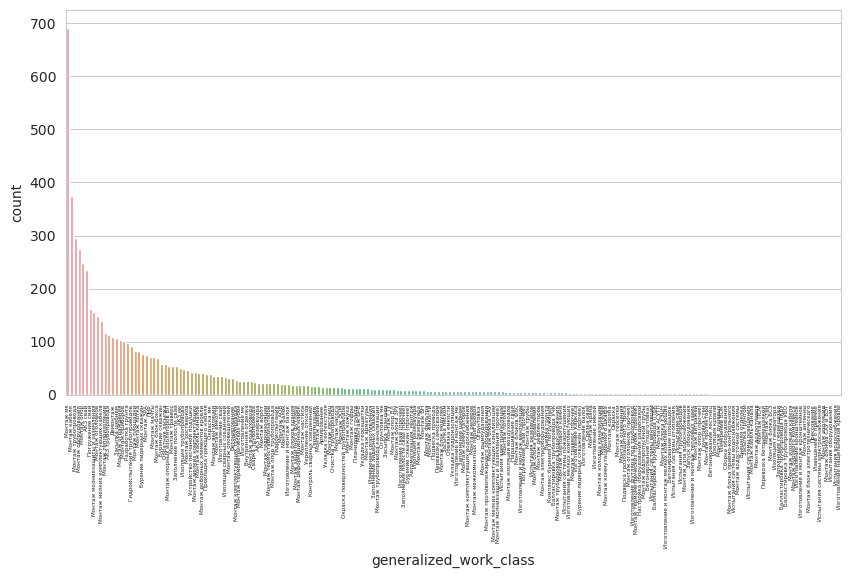

In [77]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=4)
sns.countplot(x="generalized_work_class", data=test_lemmatization_spellcheck_df, 
              order=test_lemmatization_spellcheck_df["generalized_work_class"].value_counts().index)


<AxesSubplot:xlabel='global_work_class', ylabel='count'>

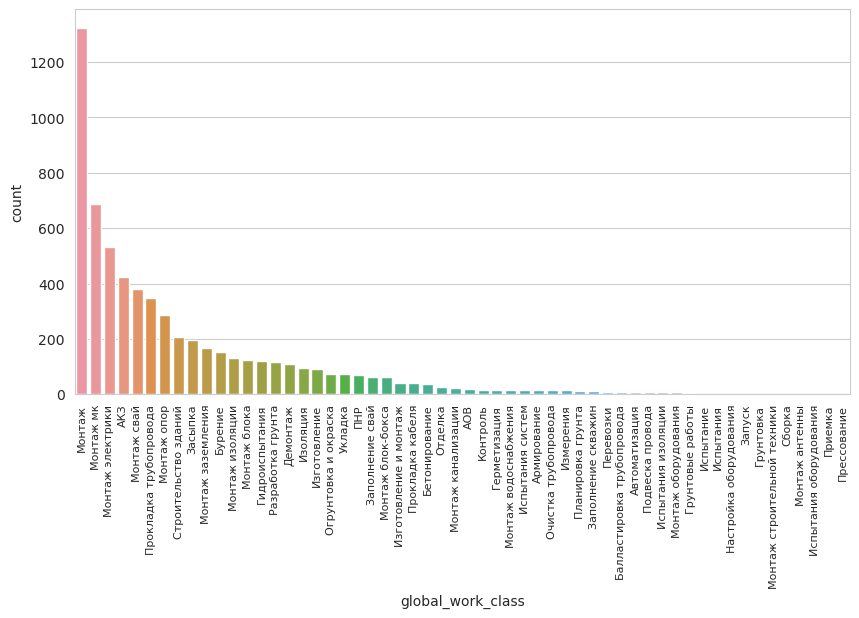

In [79]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90, size=8)
sns.countplot(x="global_work_class", data=test_lemmatization_spellcheck_df, 
              order=test_lemmatization_spellcheck_df["global_work_class"].value_counts().index)